## Introduksjon til klassifisering



In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.pyplot import *
import seaborn
from pandas import *

## Hva er klassifisering?
Klassifisering er en form for maskinlæringsproblem der man ønsker å trene maskinen til å finne hvilken kategori (klasse) noe hører til. Tenk for eksempel at du er en  maskin og jeg skal trene deg til å plukke ut bøker som jeg liker. Det første vi må gjøre er å representere bøkene med tall. For eksempel kan jeg ha hvor skummel en bok er på x aksen og hvor morsom en bok er på y aksen. Da kan vi plotte det opp i et scatterplot slik:

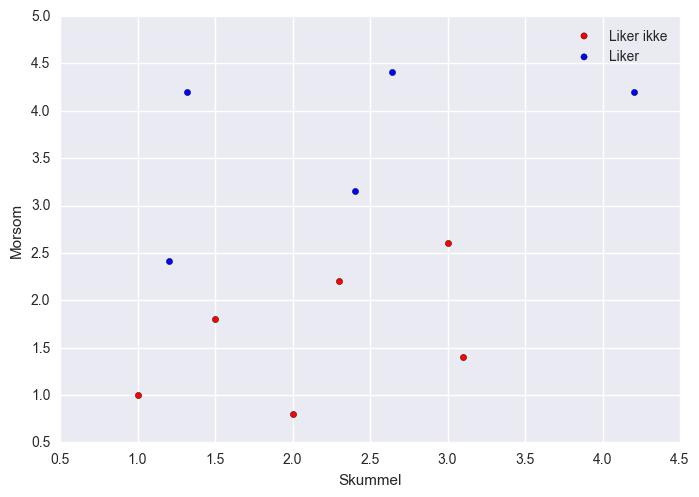

In [3]:
data = read_csv('../datasets/small_examples/books.csv') # Lese inn data

# TODO: Bestemme om vi skal dele opp dataen på denne måten (for å få labels)
# TODO: Skal vi forklare plottingen og indekseringen mer eller skal vi ha en egen notebook 
#       om behandling av dataframes?


data_klasse1 = data.loc[data['Klasse'] == 0] 
data_klasse2 = data.loc[data['Klasse'] == 1]

scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')
scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

xlabel('Skummel')
ylabel('Morsom')

legend()
show()

De blå punktene er bøker som jeg liker og de røde punktene er bøker jeg ikke liker. Du ser kanskje at det er et mønster her? Hvis jeg nå kommer med en ny, ukjent bok som er middels skummel og veldig lite morsom. (Representert i plottet under som et spørsmåltegn)


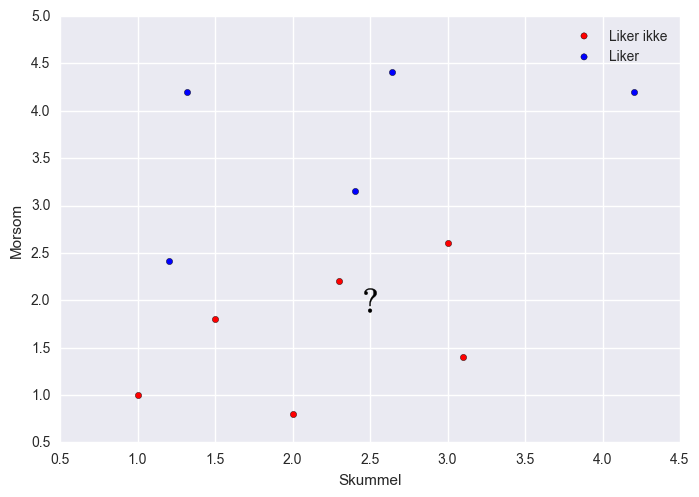

In [4]:
figure()

scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')
scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')
scatter(2.5,2,c='k',s=300,marker='$?$')

xlabel('Skummel')
ylabel('Morsom')

legend()
show()

**Oppgave 1:** Tror du at jeg kommer til å like eller ikke like boken? Hvorfor? Fyll inn svar i cellen under

In [5]:
# Ditt svar her

**Oppgave 2:** Hva om jeg har en bok representert av punktet (2,3.6)? Kommer Jeg til å like eller ikke like boken?

In [6]:
# Ditt svar her

Men å se på plottet og avgjøre manuelt hvilken klasse et eksempel har er ikke spesielt presist. Det vi ønsker er å finne en måte for maskinen å lære og bestemme klassen til et eksempel basert på gitte egenskaper

## Nærmeste Nabo

En enkel måte og finne hvilken klasse et eksempel tilhører, er å se på *det nærmeste kjente eksempelet*. Det er rimelig å anta at ting som er like har samme klasse. Hvis jeg for eksempel finner en ny bok, og den er ganske lik som en annen bok jeg liker, er det sannsynlig at jeg vil like den nye boka også. 
Så en mulig taktikk for å klassifisere et nytt punkt, `x_ny`, er å først finne det nærmeste andre punktet, `x_nabo`. Så kan vi sjekke hvilken klasse det har og så si at klassen til `x_ny`, er den samme som klassen til `x_nabo`. Med andre ord: Hvis den nye boka ligner mest på en bok jeg vet jeg liker, så gjetter vi at jeg liker den nye boka også! Denne algortimen kaller vi *Nærmeste Nabo*

**Oppgave 3:** Ta en titt figuren over igjen. Hvilket punkt er den nærmeste naboen til det ukjente punktet? Hvilken klasse får det ukjente punktet da?

In [7]:
# ditt svar her

## K Nærmeste Naboer
Hva om det plutselig er en middels skummel og lite morsom bok jeg plutselig liker selv om jeg vanligvis ikke gjør det? Da kan plottet vårt for eksempel se slikt ut

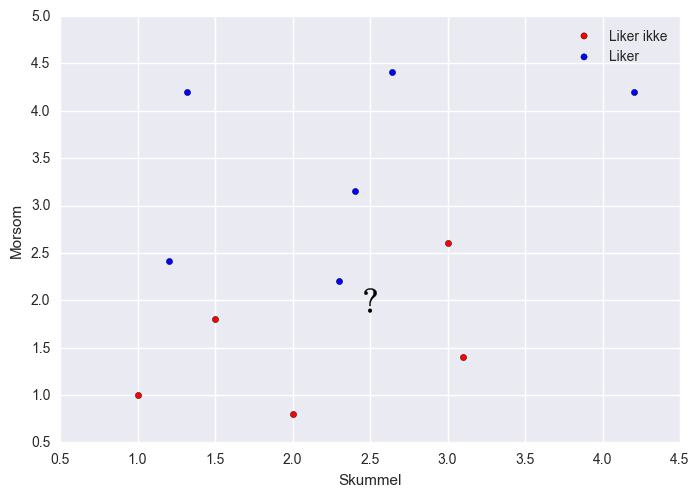

In [8]:
figure()

# Endre datapunktet
data.ix[8]['Klasse'] = 1

data_klasse1 = data.loc[data['Klasse'] == 0] 
data_klasse2 = data.loc[data['Klasse'] == 1]

scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')
scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

scatter(2.5,2,c='k',s=300,marker='$?$')

xlabel('Skummel')
ylabel('Morsom')

legend()
show()

** Oppgave 4: ** Hvilken klasse vil spørsmåltegnet få nå?

In [9]:
# Ditt svar her

Som vi ser er Nærmeste Nabo algoritmen følsom for "støy" i dataene. En bok som er litt anderledes vil påvirke anbefalingen av fremtidige bøker. En måte å komme rundt dette på, er å **spørre mer enn en nabo.** Hvis vi for eksempel spør de tre nærmeste naboene vil vi i dette tilfellet få ("liker", "liker ikke", "liker ikke"). Det er et flertall av "liker ikke", så vi setter `x_ny` til å også få klassen "liker ikke". Dette kalles *K nærmeste nabo algoritmen* hvor k er antallet nærmeste naboer vi spør. Det er gjerne sånn at dersom vi spør flere naboer, så blir vi sikrere, men hvis vi spør for mange kan det også gå galt. 

I det mest ekstreme tilfellet vil vi spørre alle punktene og da vil vi alltid ende opp med klassen som flest punkter tilhører. I vårt eksempel vil alle bøker få klassen "liker ikke" siden det er flest punkter i den klassen. 
Det å finne den riktige balansen mellom høy og lav k er et eksempel på en av de viktigste utfordringene i maskinlæring, nemlig valg av parametere. Vi skal snakke mer om det siden. 

## KNN i kode

Hvis du har kjennskap til programmering fra før har du kanskje begynt å tenke hvordan KNN kan skrives i kode. Jeg anbefaler alle som har lyst til å prøve og implementere algoritmen selv. Det er veldig lærerikt og alt man trenger å gjøre er å søke gjennom alle punkter, finne de k nærmeste punktene og telle opp hvilken klasse som har flertall blant de. 

Men i dette kurset skal vi bruke scikit learn sin ferdige klasse KNN. Den brukes veldig likt som vi gjorde for linær regresjon:

In [10]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(data[['Skummel','Morsom']],data['Klasse'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Når vi har trent klassifikatoren med clf.fit(x,y) kan vi klassifisere nye eksempler med clf.predict(x_ny). 

In [11]:
clf.predict([[2.5,2]])

array([ 0.])

## Overtilpassing

Akkurat som for regresjon, kan overtilpassing være et problem. Spesielt hvis eksemplene overlapper litt. Sett at vi har følgende data. Hvilken av de to linjene tror du passer best?

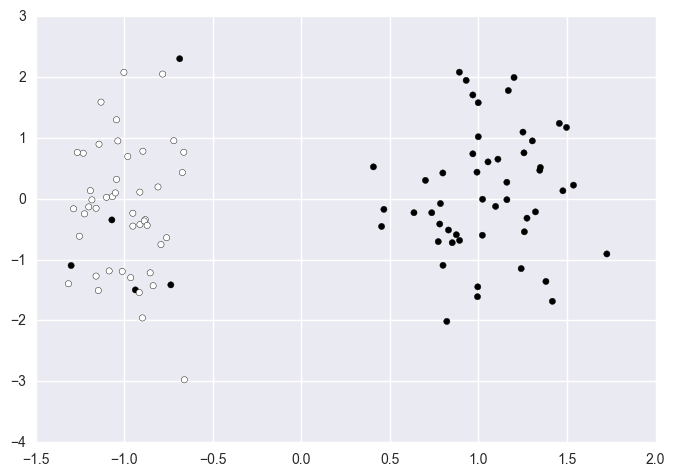

In [12]:
from sklearn.datasets import make_classification

figure()
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,flip_y=0.05,random_state=100)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
show()

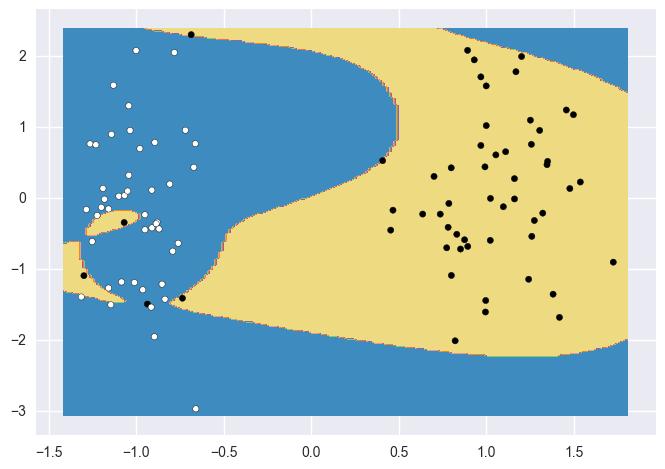

In [13]:
from useful_tools import plot_boundary
clf2 = SVC(C=1000000)
clf2.fit(X1,Y1)
plot_boundary(X1,clf2,padding=0.1)

scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
show()

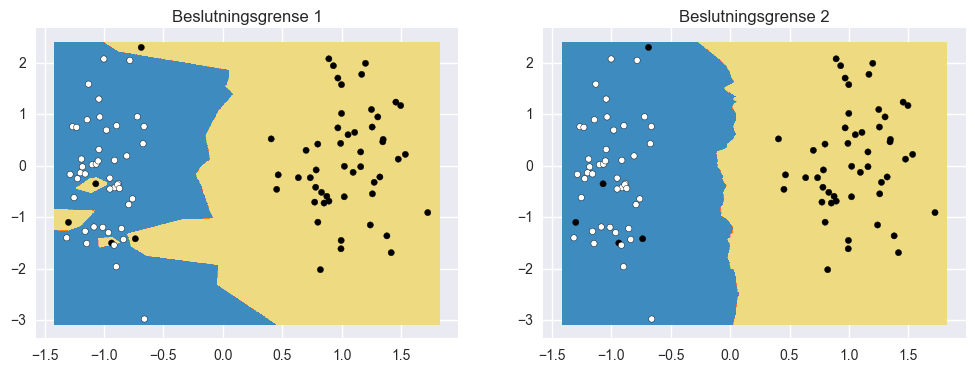

In [24]:
from useful_tools import plot_boundary

figure(figsize=(12, 4))

clf1 = KNeighborsClassifier(n_neighbors = 1)
clf1.fit(X1,Y1)
subplot(1,2,1)
plot_boundary(X1,clf1,padding=0.1,plot_step=0.005)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
title('Beslutningsgrense 1')

clf2 = KNeighborsClassifier(n_neighbors = 10)
clf2.fit(X1,Y1)
subplot(1,2,2)
plot_boundary(X1,clf2,padding=0.1,plot_step=0.005)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
title('Beslutningsgrense 2')
show()

Linje a passer perfekt til dataen, men den er veldig detaljert og kronglete. Den virker ikke som den generaliserer bra til ukjent data. Linje b passer litt dårligere men den er mer generell. 

Så for å måle hvor bra en klassifiseringsmodell er, er det svært viktig at vi deler inn i trening og testdata. 
Nytt eksempel:
Klassifisere blomster 



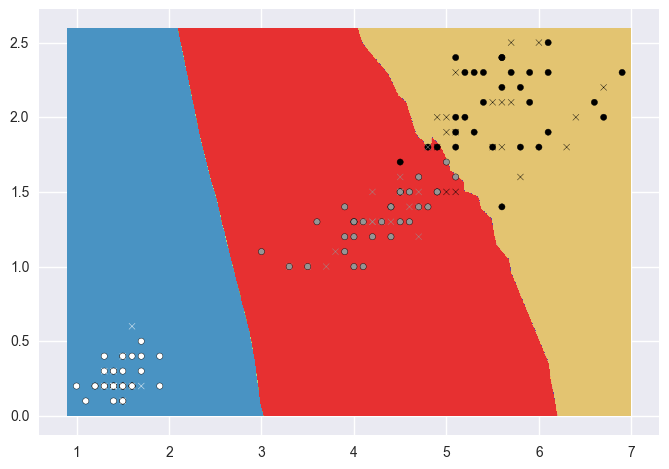

In [46]:
# laste inn data
iris = load_iris()
F1 = 2
F2 = 3

data = iris.data[:,[F1,F2]]

from sklearn.model_selection import train_test_split

train_data, test_data,train_target,  test_target = train_test_split(data, iris.target, test_size=0.33, random_state=54)

clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(train_data,train_target)

figure()
plot_boundary(data,clf,padding=0.1,plot_step=0.005)
scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_target)
scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_target)
show()

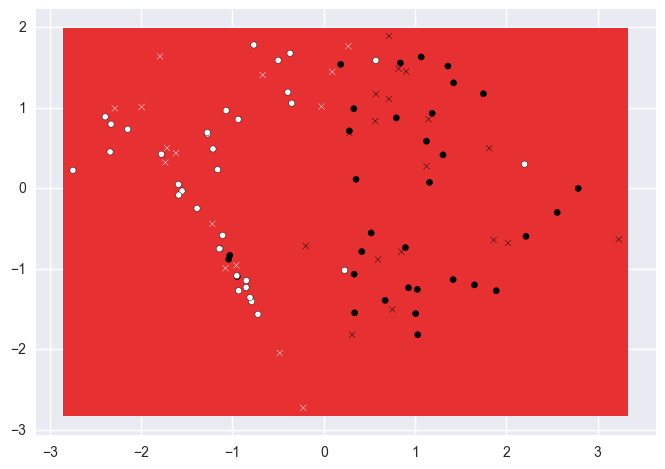

0.454545454545
0.507462686567


In [71]:
from sklearn.datasets import make_classification

figure()
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2,flip_y=0.05,random_state=5)



train_data, test_data,train_target,  test_target = train_test_split(X1, Y1, test_size=0.33, random_state=54)

clf = KNeighborsClassifier(n_neighbors = 67)
clf.fit(train_data,train_target)


plot_boundary(X1,clf,padding=0.1,plot_step=0.005)
scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_target)
scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_target)

show()

predictions = clf.predict(test_data)

print np.mean(clf.predict(test_data)==test_target)
print np.mean(clf.predict(train_data)==train_target)

La oss prøve et litt mer komplisert eksempel. 

splitt inn i trening og testdata

plot treningsdata og testdata

lage og trene klassifikator

Finne nøyaktighet for testdata

plotte beslutningsgrense

Oppgave: prøv å kjøre cellene på nytt med andre verdier av k på beslutningsgrensa? Hvilken sammenheng har det med test nøyaktigheten?

Oppgave: 'filepath' inneholder et datasett over X. Finn en bra klassifisering av dfkadj. Ekperimenter med ulike verdier av k. Hva er den beste nøyaktigheten du kan få?

ditt svar her. 


LOGISTISK REGRESJON
KNN er en algortime for klassifisering.
En annen måte å gjøre klassifisering på er å bruke regresjon. La oss se på et 1d eksemel. 

(eksempel her)

Her er alle eksemplene med klasse A , 0 og klasse B er 1. Vi ønsker å finne hvor skillet mellom klassene går. Den enkleste løsningen vil være linær regresjon. Alt vi trenger å gjøre er å tilpasse en linje til punktene som før. Så kan vi terskle linja.  Dvs. Vi kan si at der linja er over en hvis grense. f.eks 0.5

(eksempel her)

Dette kan også utvides til 2d data

(eksempel her)

Problemet er at linja vil bli veldig forskjellig allerede hvis vi legger til et lite punkt. 

(eksempel her)


Dette vil også påvirke terskelen. Vi vil helst ikke ha en modell som er så lett påvirket av små endringer i dataene. Heldigvis er det lett å fikse dette problemet. Vi bytter ut den linære funksjonen med en logistisk funksjon. 
Denne terskler vi på 0.5 Mye mindre påvirket av små endringer i data. 

Logistisk regresjon i kode. 

(eksempel)

Hvordan ser grensa ut?

Utvidelse til flere klasser. 

knn er bare å bruke flere klasser, ikke noe problem

logistisk regresjon kan man bruke alle mot en klassifisering 

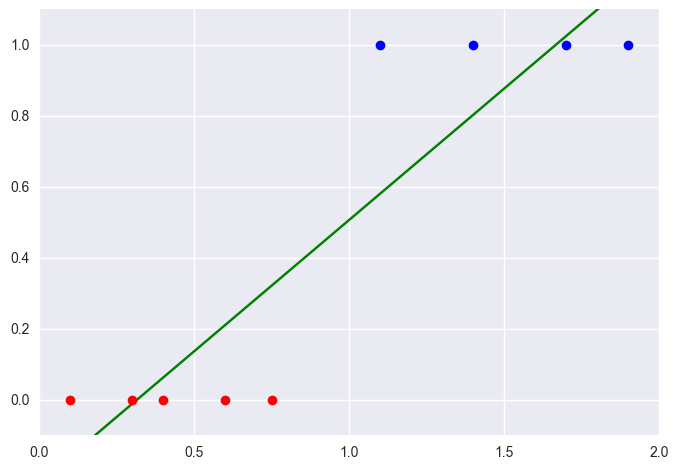

In [89]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1])

x0 = x[y==0]
y0 = y[y==0]


x1 = x[y==1]
y1 = y[y==1]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

t = np.linspace(0,2,1001)

l = reg.predict(t[:,np.newaxis])

plot(t,l,'g-')
plot(x0,y0,'ro')
plot(x1,y1,'bo')
axis([0,2,-0.1,1.1])
show()

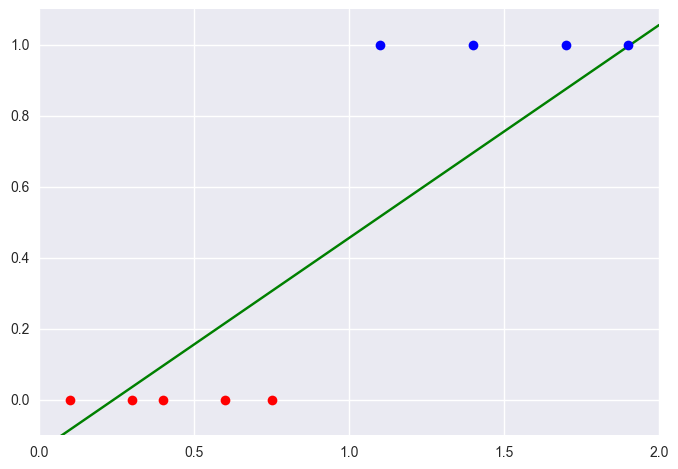

In [95]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9,2.1,2.3])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1,1,1])

x0 = x[y==0]
y0 = y[y==0]


x1 = x[y==1]
y1 = y[y==1]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

t = np.linspace(0,2,1001)

l = reg.predict(t[:,np.newaxis])
figure()
plot(t,l,'g-')
plot(x0,y0,'ro')
plot(x1,y1,'bo')
axis([0,2,-0.1,1.1])
show()

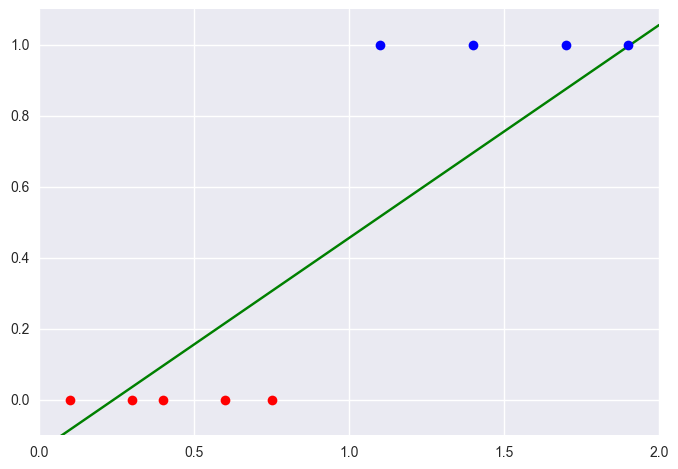

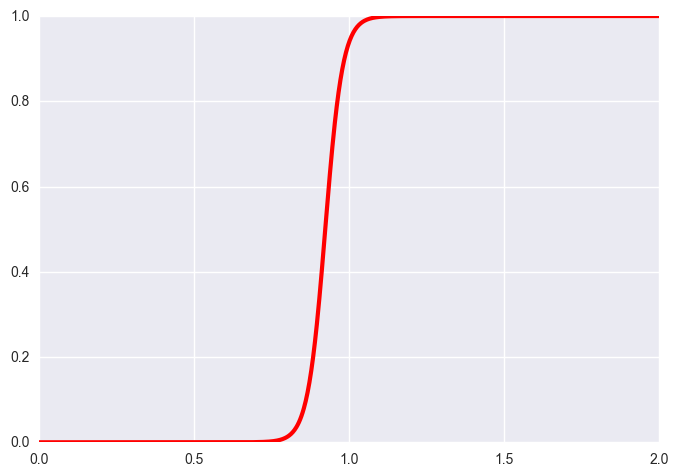

In [99]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9,2.1,2.3])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1,1,1])

x0 = x[y==0]
y0 = y[y==0]


x1 = x[y==1]
y1 = y[y==1]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

t = np.linspace(0,2,1001)

l = reg.predict(t[:,np.newaxis])
figure()
plot(t,l,'g-')
plot(x0,y0,'ro')
plot(x1,y1,'bo')
axis([0,2,-0.1,1.1])
show()

from sklearn.linear_model import LogisticRegression

reg2 = LogisticRegression(C=1e5)
reg2.fit(x[:,np.newaxis],y[:,np.newaxis])

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(t * reg2.coef_ + reg2.intercept_).ravel()

plot(t, loss, color='red', linewidth=3)
show()

<IPython.core.display.Javascript object>


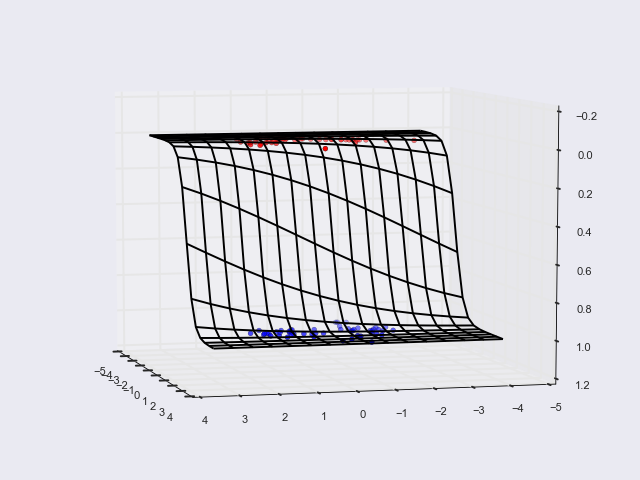

[ 0.17282938]
(16L, 16L)


<IPython.core.display.Javascript object>


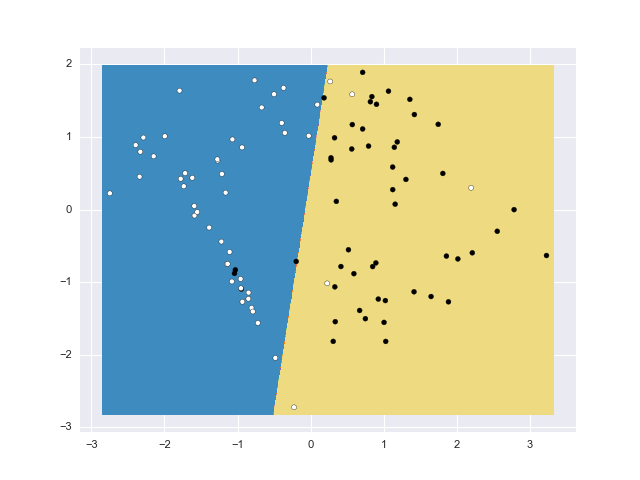

In [148]:
% matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

clf_log = LogisticRegression(C=1e5)
clf_log.fit(X1,Y1)


fig = figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0][Y1==0], X1[:,1][Y1==0], Y1[Y1==0],facecolors='r')
ax.scatter(X1[:,0][Y1==1], X1[:,1][Y1==1], Y1[Y1==1],facecolors='b')


x = y = np.arange(-4, 4, 0.5)
X, Y  = np.meshgrid(x, y)

print clf_log.intercept_

def model2d(c,b,x,y):
    return model(c[0]*x + c[1]*y + b)

Z = model2d(clf_log.coef_[0],clf_log.intercept_,X,Y)

print Z.shape

ax.plot_wireframe(X, Y, Z,color ='k')
show()

figure()

plot_boundary(X1,clf_log,padding=0.1,plot_step=0.005)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
show()

<IPython.core.display.Javascript object>


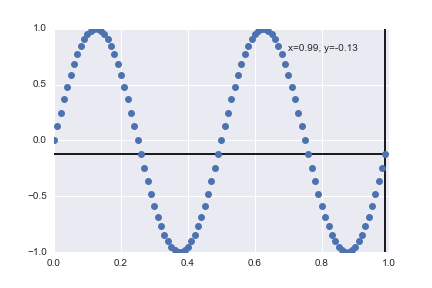

In [177]:
% matplotlib notebook
# -*- noplot -*-

"""
This example shows how to use matplotlib to provide a data cursor.  It
uses matplotlib to draw the cursor and may be a slow since this
requires redrawing the figure with every mouse move.

Faster cursoring is possible using native GUI drawing, as in
wxcursor_demo.py.

The mpldatacursor and mplcursors third-party packages can be used to achieve a
similar effect.  See
    https://github.com/joferkington/mpldatacursor
    https://github.com/anntzer/mplcursors
"""
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np


class Cursor(object):
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        plt.draw()


class SnaptoCursor(object):
    """
    Like Cursor but the crosshair snaps to the nearest x,y point
    For simplicity, I'm assuming x is sorted
    """

    def __init__(self, ax, x, y):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = x
        self.y = y
        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):

        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata

        indx = np.searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        print('x=%1.2f, y=%1.2f' % (x, y))
        plt.draw()

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*2*np.pi*t)
fig, ax = plt.subplots()

#cursor = Cursor(ax)
cursor = SnaptoCursor(ax, t, s)
plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, s, 'o')
plt.axis([0, 1, -1, 1])
plt.show()

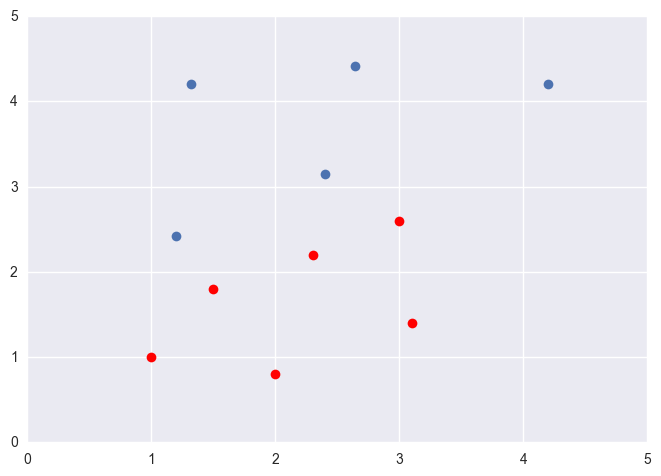

In [59]:
x = np.array([1,1.1,2,2.2,3.5])*1.2
y = np.array([1.15,2,1.5,2.1,2])*2.1

x2 = np.array([1,1.5,2,2.3,3.1,3,])
y2 = np.array([0.5,0.9,0.4,1.1,0.7,1.3])*2


plot(x,y,'o')
plot(x2,y2,'ro')
axis([0,5,0,5])
show()

<IPython.core.display.Javascript object>


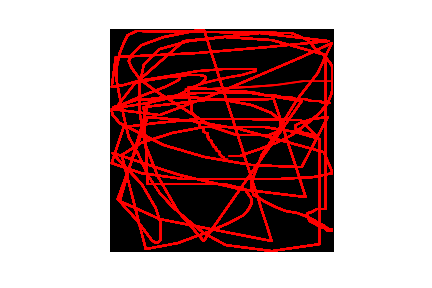

In [176]:
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#https://stackoverflow.com/questions/37668094/how-to-add-visual-annotations-to-an-image-using-python-in-a-jupyter-notebook

class Annotator(object):
    def __init__(self, axes):
        self.axes = axes

        self.xdata = []
        self.ydata = []

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata

        self.xdata.append(x)
        self.ydata.append(y)
        line = Line2D(self.xdata,self.ydata)
        line.set_color('r')
        self.axes.add_line(line)

        plt.draw()

    def mouse_release(self, event):
        # Erase x and y data for new line
        self.xdata = []
        self.ydata = []


img = np.ones([10,300,300])*255

fig, axes = plt.subplots()
axes.imshow(img[0])
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)

axes.plot()

plt.show()

NameError: name 'Basemap' is not defined